In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Exploring the data
data = pd.read_csv('https://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


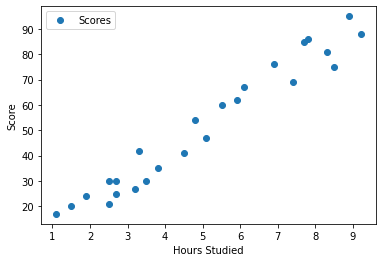

In [3]:
# Visualizing and inspecting the data in a 2D plot
data.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

From the the plot it's clear that there is a positive strong relation between the hours studeied and the score

In [4]:
# Preparing the data for training i.e. defining inputs and outputs and performing a train-test split
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
# Training the model on the data
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Training Complete.')

Training Complete.


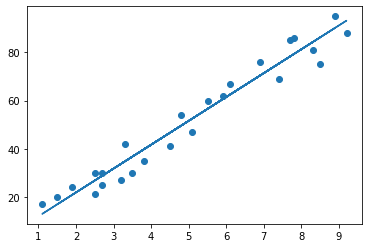

In [7]:
# Plotting the regression line over the data
line = regressor.coef_ * x + regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line)
plt.show()

In [8]:
# Evaluating the model performance
y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [9]:
error = []
for i in range(len(x_test)):
    error.append(abs(y_test[i] - y_pred[i]))
MAE = sum(error)/len(error)
print(f"Mean Absoulute Error: {MAE:.2f}")

Mean Absoulute Error: 4.18


In [10]:
# Performing predections
hours = 9.25
pred = regressor.predict(np.array([hours]).reshape(-1, 1))
print(f"Hours Studied: {hours}")
print(f"Predected Score: {pred[0]:.0f}")

Hours Studied: 9.25
Predected Score: 94
